In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

import pandas as pd

file_path = "../data_raw/tertiary.csv"
datafile = pd.read_csv(file_path)

datafile.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,Female,Not applicable,Percent,20.39494
1,Afghanistan,2014,Female,Not applicable,Number,53613.00000
2,Afghanistan,2014,All genders,Not applicable,Number,262874.00000
3,Afghanistan,2011,Female,Not applicable,Percent,24.26772
4,Afghanistan,2011,All genders,Not applicable,Number,97504.00000


In [2]:
datafile = datafile.rename(columns = {
    "Reference Area" : "Country",
    "Time Period" : "Year",
    "Sex" : "Gender",
    "Observation Value" : "Enrolments"
})

datafile.head()

,Country,Year,Gender,Age group,Units of measurement,Enrolments
0,Afghanistan,2014,Female,Not applicable,Percent,20.39494
1,Afghanistan,2014,Female,Not applicable,Number,53613.00000
2,Afghanistan,2014,All genders,Not applicable,Number,262874.00000
3,Afghanistan,2011,Female,Not applicable,Percent,24.26772
4,Afghanistan,2011,All genders,Not applicable,Number,97504.00000


In [3]:
datafile = datafile[datafile["Units of measurement"]=="Number"]

datafile.head(100)

,Country,Year,Gender,Age group,Units of measurement,Enrolments
1,Afghanistan,2014,Female,Not applicable,Number,53613.0
2,Afghanistan,2014,All genders,Not applicable,Number,262874.0
4,Afghanistan,2011,All genders,Not applicable,Number,97504.0
5,Afghanistan,2011,Female,Not applicable,Number,23662.0
7,Afghanistan,2009,Female,Not applicable,Number,17163.0
...,...,...,...,...,...,...
143,Algeria,2013,All genders,Not applicable,Number,1252579.0
144,Algeria,2012,Female,Not applicable,Number,713475.0
145,Algeria,2012,All genders,Not applicable,Number,1210272.0
147,Algeria,2011,Female,Not applicable,Number,694699.0


In [4]:
datafile = datafile.drop(columns=["Age group", "Units of measurement"])

datafile.head()

,Country,Year,Gender,Enrolments
1,Afghanistan,2014,Female,53613.0
2,Afghanistan,2014,All genders,262874.0
4,Afghanistan,2011,All genders,97504.0
5,Afghanistan,2011,Female,23662.0
7,Afghanistan,2009,Female,17163.0


In [5]:
datafile.isnull().sum()

Country       0
Year          0
Gender        0
Enrolments    0
dtype: int64

In [6]:
datafile = datafile.sort_values(by = ["Country", "Year", "Gender"])

datafile.head(100)

,Country,Year,Gender,Enrolments
35,Afghanistan,1975,All genders,12256.0
36,Afghanistan,1975,Female,1681.0
33,Afghanistan,1976,All genders,14214.0
34,Afghanistan,1976,Female,1951.0
30,Afghanistan,1977,All genders,16147.0
...,...,...,...,...
177,Algeria,1991,All genders,285930.0
176,Algeria,1992,All genders,298117.0
175,Algeria,1993,All genders,303111.0
174,Algeria,1994,All genders,298133.0


In [7]:
datafile = datafile.reset_index(drop = True)
datafile.index = datafile.index +1 

datafile.head()

,Country,Year,Gender,Enrolments
1,Afghanistan,1975,All genders,12256.0
2,Afghanistan,1975,Female,1681.0
3,Afghanistan,1976,All genders,14214.0
4,Afghanistan,1976,Female,1951.0
5,Afghanistan,1977,All genders,16147.0


In [8]:
datafile.to_csv("../data_clean/tertiary_clean.csv", index=True)

In [9]:
datafile.to_csv("../data_clean/secondary_clean.csv", index=True)

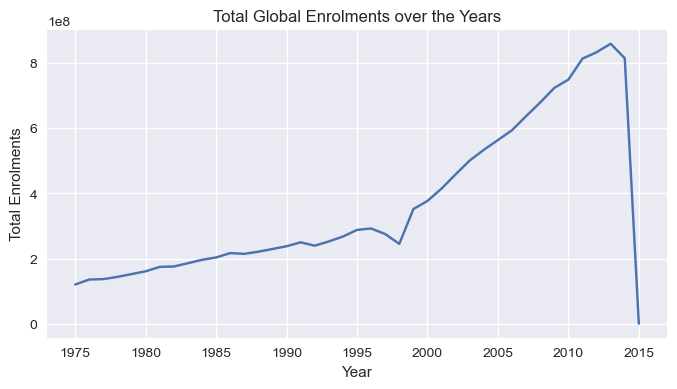

In [10]:
enrolments_years = datafile.groupby("Year")["Enrolments"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=enrolments_years, x = "Year", y = "Enrolments")
plt.title("Total Global Enrolments over the Years")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.show()

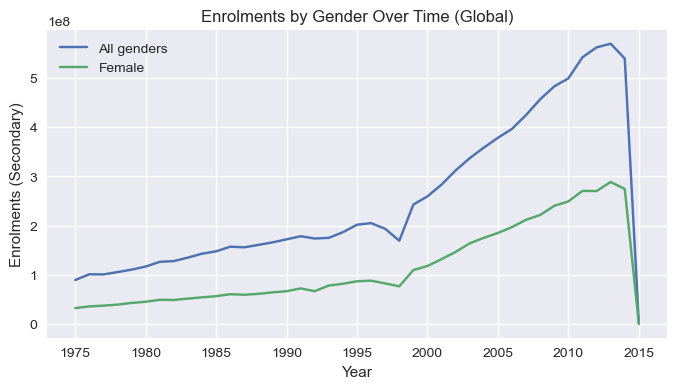

In [11]:
gender_trend = datafile.groupby(["Year", "Gender"])["Enrolments"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=gender_trend, x="Year", y="Enrolments", hue="Gender")
plt.title("Enrolments by Gender Over Time (Global)")
plt.xlabel("Year")
plt.ylabel("Enrolments (Secondary)")
plt.legend()
plt.show()

In [12]:
pivot = datafile.pivot_table(
    index="Year",
    columns="Gender",
    values="Enrolments",
    aggfunc="sum"
).reset_index()

In [13]:
pivot["Male"] = pivot["All genders"] - pivot["Female"]

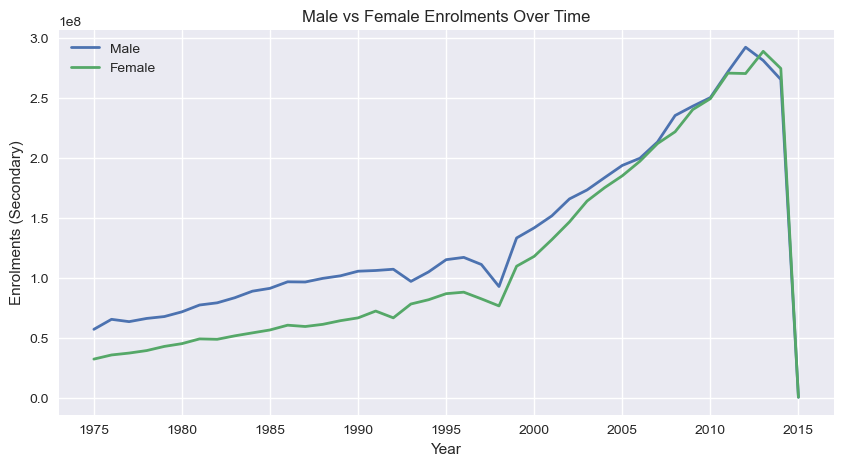

In [14]:
plt.figure(figsize=(10,5))

plt.plot(pivot["Year"], pivot["Male"], label="Male", linewidth=2)
plt.plot(pivot["Year"], pivot["Female"], label="Female", linewidth=2)

plt.title("Male vs Female Enrolments Over Time")
plt.xlabel("Year")
plt.ylabel("Enrolments (Secondary)")
plt.legend()
plt.grid(True)

plt.show()

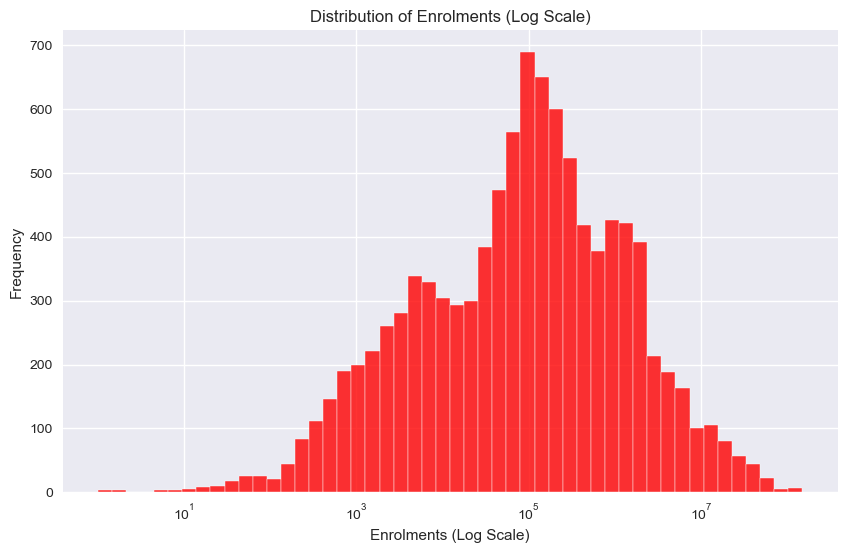

In [16]:
enrol_nonzero = datafile["Enrolments"][datafile["Enrolments"] > 0]

plt.figure(figsize=(10,6))
sns.histplot(
    enrol_nonzero,
    bins=50,
    log_scale=True,
    color="#FF0000",      
    edgecolor="white",
    alpha=0.8
)
plt.title("Distribution of Enrolments (Log Scale)")
plt.xlabel("Enrolments (Log Scale)")
plt.ylabel("Frequency")
plt.show()

In [17]:
female_data = datafile[datafile["Gender"] == "Female"]

In [18]:
female_totals = (
    female_data.groupby("Country")["Enrolments"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

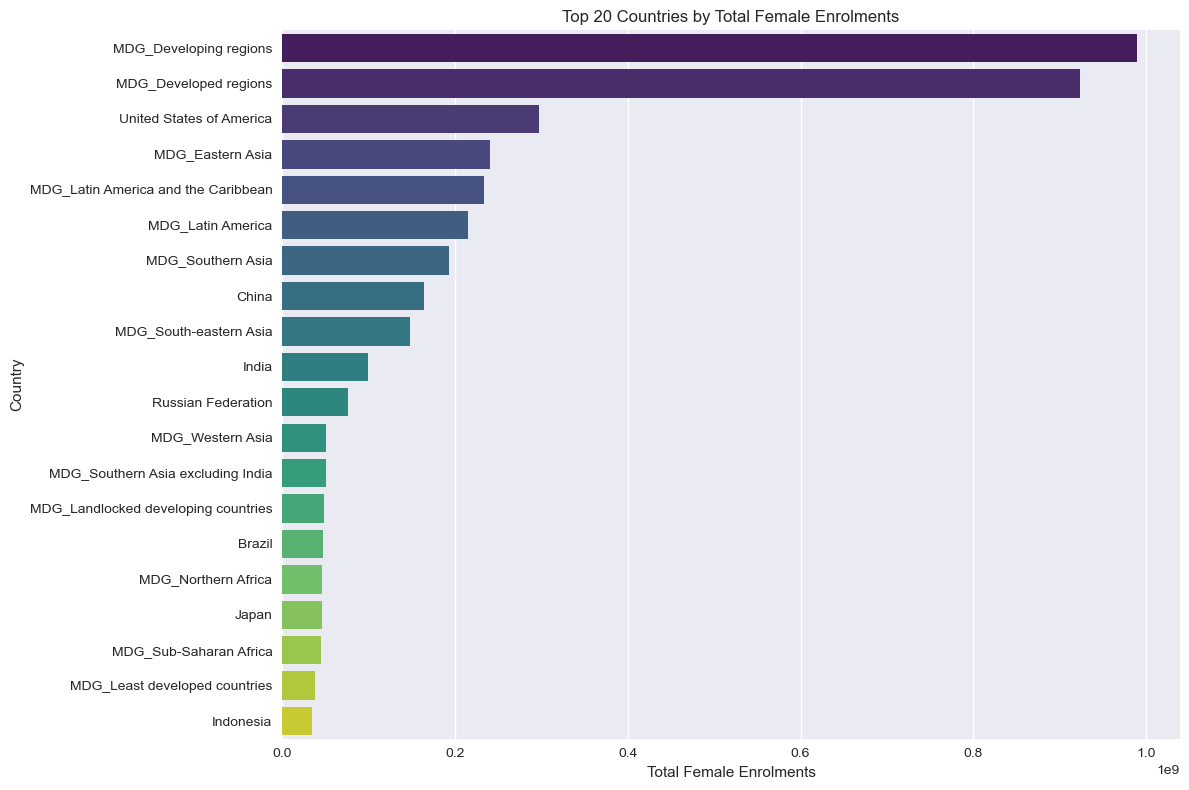

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(
    x=female_totals.values,
    y=female_totals.index,
    palette="viridis"
)

plt.title("Top 20 Countries by Total Female Enrolments")
plt.xlabel("Total Female Enrolments")
plt.ylabel("Country")



plt.tight_layout()
plt.show()